# Assignment 7


## Library Installation (Optional)


In [1]:
# Where are you running this? Can be either 'local' or 'colab'
model_run_location = "colab"

# # Do you want to install the required packages?
# install_required_packages = False
install_required_packages = False if model_run_location == "local" else True

In [2]:
# # Install any required libraries not present in your working environment

if install_required_packages:
    # # Needed locally and in colab
    # !pip install torchsummary
    # !conda install -c frgfm torchscan

    import sys
    !{sys.executable} -m pip install torchsummary

    # # Only if you want to automate receptive field calculation
    # if model_run_location == 'colab':
    #     !{sys.executable} -m pip install torchscan
    # elif model_run_location == 'local':
    #     %conda install --yes --prefix {sys.prefix} -c frgfm torchscan

    # # Needed locally
    # !conda install -c conda-forge tqdm
    # !conda install -c anaconda ipywidgets

    if model_run_location == 'local':
        %conda install --yes --prefix {sys.prefix} -c conda-forge tqdm
        %conda install --yes --prefix {sys.prefix} -c anaconda ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Mount Drive


In [3]:
# Mount google drive if running on colab
if model_run_location == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/WorkSpace/era-v1/Session 07/Submission

Mounted at /content/drive
/content/drive/MyDrive/WorkSpace/era-v1/Session 07/Submission


## Import Libraries


In [4]:
# Import necessary modules (external libs)
from __future__ import print_function

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torchvision import transforms

In [5]:
# Import user defined modules
from model import Net as Net, plot_train_test_metrics, test_model, train_model
from utils import download_mnist_data, get_device, plot_sample_training_images

In [6]:
# Functionality to check cuda support and create device is now moved to utils.py
device_support, device = get_device()
print(f"Device created with {device_support}!")

Device created with cuda!


## Data Transformations


In [7]:
# Train and test data transformation steps now moved to apply_mnist_image_transformations()


def apply_mnist_image_transformations():
    """
    Function to apply the required transformations to the MNIST dataset.
    """
    # Apply the required transformations to the MNIST dataset
    train_transforms = transforms.Compose(
        [
            # Convert the images to tensors
            # normalize the images with mean and standard deviation from the whole dataset
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
        ]
    )

    # Test data transformations
    test_transforms = transforms.Compose(
        # Convert the images to tensors
        # normalize the images with mean and standard deviation from the whole dataset
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )

    return train_transforms, test_transforms


train_transforms, test_transforms = apply_mnist_image_transformations()

## Train/Test Split


In [8]:
data_path = "../data"
print(f"Train and test data path: {data_path}")

train_data, test_data = download_mnist_data(
    data_path, train_transforms, test_transforms
)

Train and test data path: ../data


## Dataloaders


In [9]:
# Set seed value for reproducibility
seed = 1

# For reproducibility
torch.manual_seed(seed)

if device_support == "cuda":
    torch.cuda.manual_seed(seed)

batch_size = 32

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = (
    dict(shuffle=True, batch_size=batch_size, num_workers=2, pin_memory=True)
    if device_support == "cuda"
    else dict(shuffle=True, batch_size=batch_size * 2)
)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

## Sample Training Images


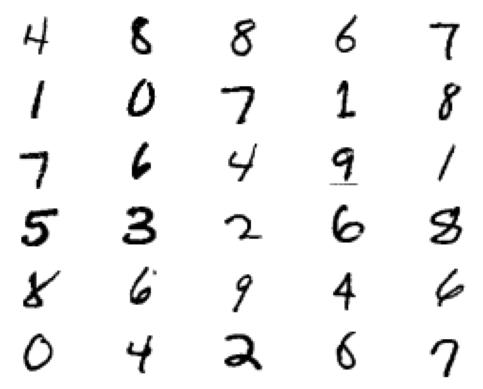

In [10]:
# Get a batch of training data from train_loader
batch_data, batch_label = next(iter(train_loader))

# Plot 60 sample images from the training data along with their labels
# plot_sample_training_images() imported from utils.py
fig = plot_sample_training_images(batch_data, num_images=30)
plt.show()

## Model Summary


In [11]:
# Model class is imported from model.py
# Send the model to device
model = Net().to(device)
# Print the model summary by specifying the input size
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


## Metric Initialisation


In [12]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

## Train and Test


In [13]:
# Create optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# Specify the number of epochs
num_epochs = 15

for epoch in range(1, num_epochs + 1):
    if epoch == 1:
        print(f"\n\nBatch size: {batch_size}, Total epochs: {num_epochs}\n\n")

    # Print the current epoch
    print(f"Epoch {epoch}")
    # Train the model
    train_model(model, device, train_loader, optimizer, train_acc, train_losses)
    # Test the model
    test_model(model, device, test_loader, test_acc, test_losses)
    # Line break before next epoch
    print("\n")



Batch size: 32, Total epochs: 15


Epoch 1


Train: Loss=0.0461, Batch_id=1874, Accuracy=94.63: 100%|██████████| 1875/1875 [00:29<00:00, 64.07it/s]


Test set: Average loss: 0.0419, Accuracy: 9869/10000 (98.69%)


Epoch 2


Train: Loss=0.0513, Batch_id=1874, Accuracy=98.72: 100%|██████████| 1875/1875 [00:27<00:00, 67.73it/s]


Test set: Average loss: 0.0276, Accuracy: 9910/10000 (99.10%)


Epoch 3


Train: Loss=0.0394, Batch_id=1874, Accuracy=99.14: 100%|██████████| 1875/1875 [00:28<00:00, 65.93it/s]


Test set: Average loss: 0.0260, Accuracy: 9924/10000 (99.24%)


Epoch 4


Train: Loss=0.0013, Batch_id=1874, Accuracy=99.43: 100%|██████████| 1875/1875 [00:28<00:00, 65.97it/s]


Test set: Average loss: 0.0308, Accuracy: 9897/10000 (98.97%)


Epoch 5


Train: Loss=0.0037, Batch_id=1874, Accuracy=99.56: 100%|██████████| 1875/1875 [00:28<00:00, 66.47it/s]


Test set: Average loss: 0.0313, Accuracy: 9907/10000 (99.07%)


Epoch 6


Train: Loss=0.0001, Batch_id=1874, Accuracy=99.66: 100%|██████████| 1875/1875 [00:28<00:00, 66.64it/s]


Test set: Average loss: 0.0320, Accuracy: 9914/10000 (99.14%)


Epoch 7


Train: Loss=0.0007, Batch_id=1874, Accuracy=99.73: 100%|██████████| 1875/1875 [00:28<00:00, 66.48it/s]


Test set: Average loss: 0.0253, Accuracy: 9922/10000 (99.22%)


Epoch 8


Train: Loss=0.0002, Batch_id=1874, Accuracy=99.78: 100%|██████████| 1875/1875 [00:28<00:00, 66.75it/s]


Test set: Average loss: 0.0282, Accuracy: 9923/10000 (99.23%)


Epoch 9


Train: Loss=0.0021, Batch_id=1874, Accuracy=99.83: 100%|██████████| 1875/1875 [00:27<00:00, 67.61it/s]


Test set: Average loss: 0.0439, Accuracy: 9895/10000 (98.95%)


Epoch 10


Train: Loss=0.0016, Batch_id=1874, Accuracy=99.85: 100%|██████████| 1875/1875 [00:29<00:00, 62.82it/s]


Test set: Average loss: 0.0296, Accuracy: 9925/10000 (99.25%)


Epoch 11


Train: Loss=0.0003, Batch_id=1874, Accuracy=99.90: 100%|██████████| 1875/1875 [00:29<00:00, 64.40it/s]


Test set: Average loss: 0.0263, Accuracy: 9937/10000 (99.37%)


Epoch 12


Train: Loss=0.0000, Batch_id=1874, Accuracy=99.98: 100%|██████████| 1875/1875 [00:29<00:00, 63.71it/s]


Test set: Average loss: 0.0302, Accuracy: 9935/10000 (99.35%)


Epoch 13


Train: Loss=0.0217, Batch_id=1874, Accuracy=99.84: 100%|██████████| 1875/1875 [00:28<00:00, 65.16it/s]


Test set: Average loss: 0.0363, Accuracy: 9917/10000 (99.17%)


Epoch 14


Train: Loss=0.0001, Batch_id=1874, Accuracy=99.86: 100%|██████████| 1875/1875 [00:28<00:00, 64.98it/s]


Test set: Average loss: 0.0286, Accuracy: 9938/10000 (99.38%)


Epoch 15


Train: Loss=0.0000, Batch_id=1874, Accuracy=99.89: 100%|██████████| 1875/1875 [00:28<00:00, 66.14it/s]


Test set: Average loss: 0.0273, Accuracy: 9937/10000 (99.37%)




## Metrics


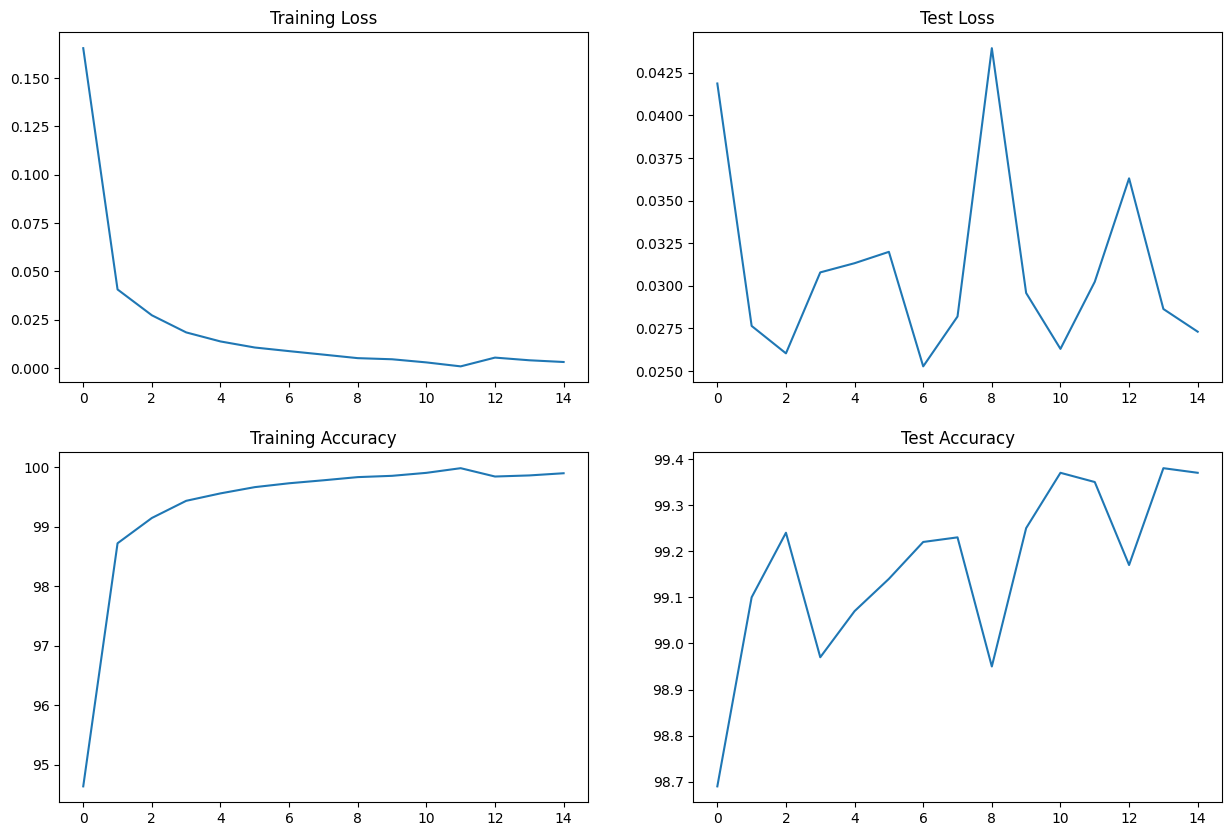

In [14]:
# Plot the accuracy and loss graphs using data and plot_train_test_metrics() from model.py
fig, axs = plot_train_test_metrics(train_losses, train_acc, test_losses, test_acc)
plt.show()